In [2]:
import pickle
import matplotlib.pyplot as plt

In [8]:
with open("2006_with_previous_filtering.txt", "r") as infile:
        filtered_IDs = infile.read().replace("\n","").split(",")
        filtered_IDs = set([int(bmrb_id) for bmrb_id in filtered_IDs])


In [9]:
len(filtered_IDs)

646

In [24]:
with open("chemical_shifts.pkl", "rb") as infile:
        chemical_shifts = pickle.load(infile)
        bmrb_ids = set(list(chemical_shifts))

In [25]:
filtered_chemical_shifts = list(filtered_IDs.intersection(bmrb_ids))

In [26]:
len(filtered_chemical_shifts)

646

# H-Shifts

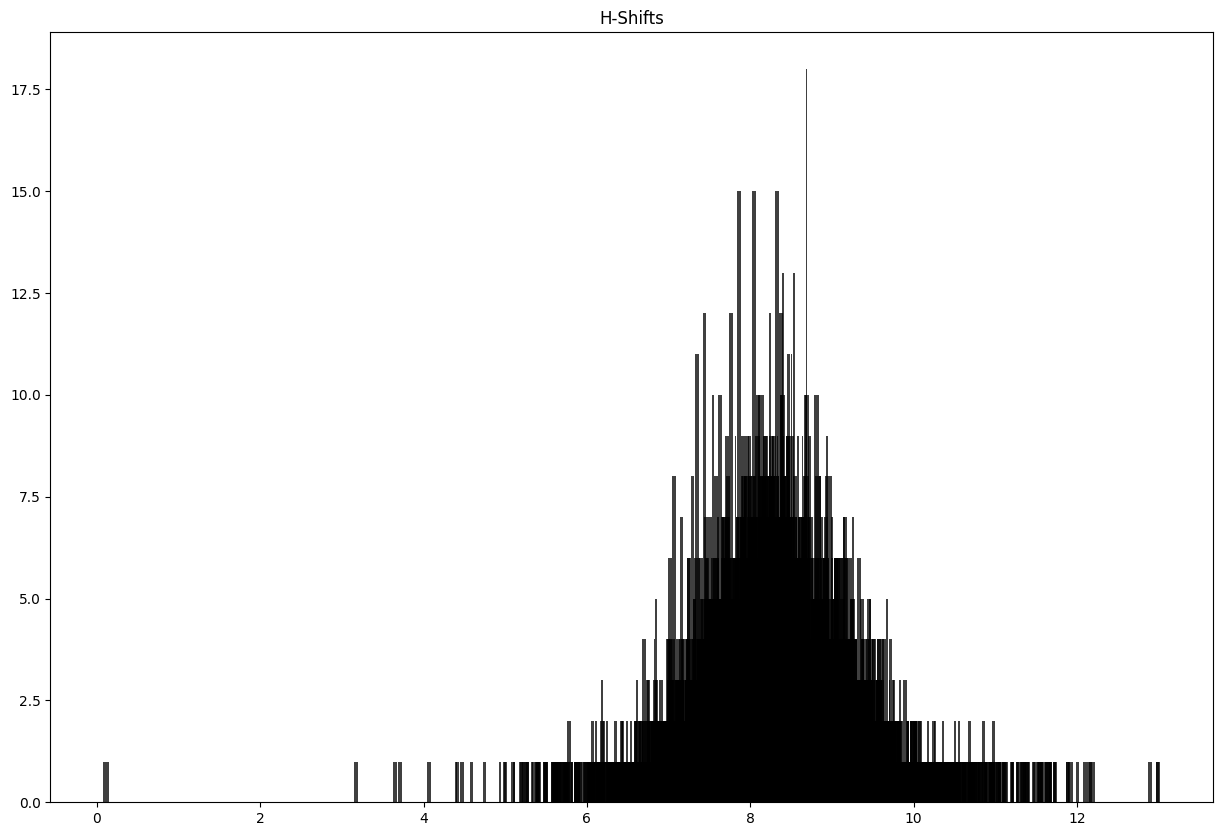

In [32]:
plt.figure(figsize=(15,10))
for bmrb_id in filtered_chemical_shifts:
    plt.hist(chemical_shifts[bmrb_id].X_shift, 150, density=False, alpha=0.75, histtype="stepfilled", color="black")
plt.title("H-Shifts")
plt.show()

## Filtering

In [33]:
H_to_large_or_small = []
for bmrb_id in filtered_chemical_shifts:
    if max(chemical_shifts[bmrb_id].X_shift) > 11 or min(chemical_shifts[bmrb_id].X_shift) < 6:
        print(bmrb_id, ":", "max --> ",max(chemical_shifts[bmrb_id].X_shift), "min --> ", min(chemical_shifts[bmrb_id].X_shift))
        H_to_large_or_small.append(bmrb_id)

6159 : max -->  10.111 min -->  5.997
6160 : max -->  11.227 min -->  7.187
6176 : max -->  9.78 min -->  4.92
6189 : max -->  10.082 min -->  5.652
4155 : max -->  9.68 min -->  5.38
4184 : max -->  10.74 min -->  4.98
6254 : max -->  11.388 min -->  7.168
6259 : max -->  11.22 min -->  6.972
6266 : max -->  9.528 min -->  5.81
6272 : max -->  9.46 min -->  5.38
6295 : max -->  12.026 min -->  6.307
6298 : max -->  9.806 min -->  3.63
4262 : max -->  10.09 min -->  5.84
4263 : max -->  9.87 min -->  3.15
4265 : max -->  11.58 min -->  6.05
6312 : max -->  11.492 min -->  6.441
6313 : max -->  11.06 min -->  6.72
4276 : max -->  9.63 min -->  4.57
6331 : max -->  10.109 min -->  5.257
6337 : max -->  11.016 min -->  6.135
6357 : max -->  11.07 min -->  6.614
6359 : max -->  12.185 min -->  6.781
4312 : max -->  11.67 min -->  6.36
6365 : max -->  10.98 min -->  5.59
4342 : max -->  9.7 min -->  4.38
6390 : max -->  11.76 min -->  6.38
6393 : max -->  11.15 min -->  6.56
6416 : max --> 

In [34]:
keys = filtered_chemical_shifts.copy()

In [35]:
len(keys)

646

In [36]:
for bmrb_id in H_to_large_or_small:
    keys.remove(bmrb_id)

# N-Shifts

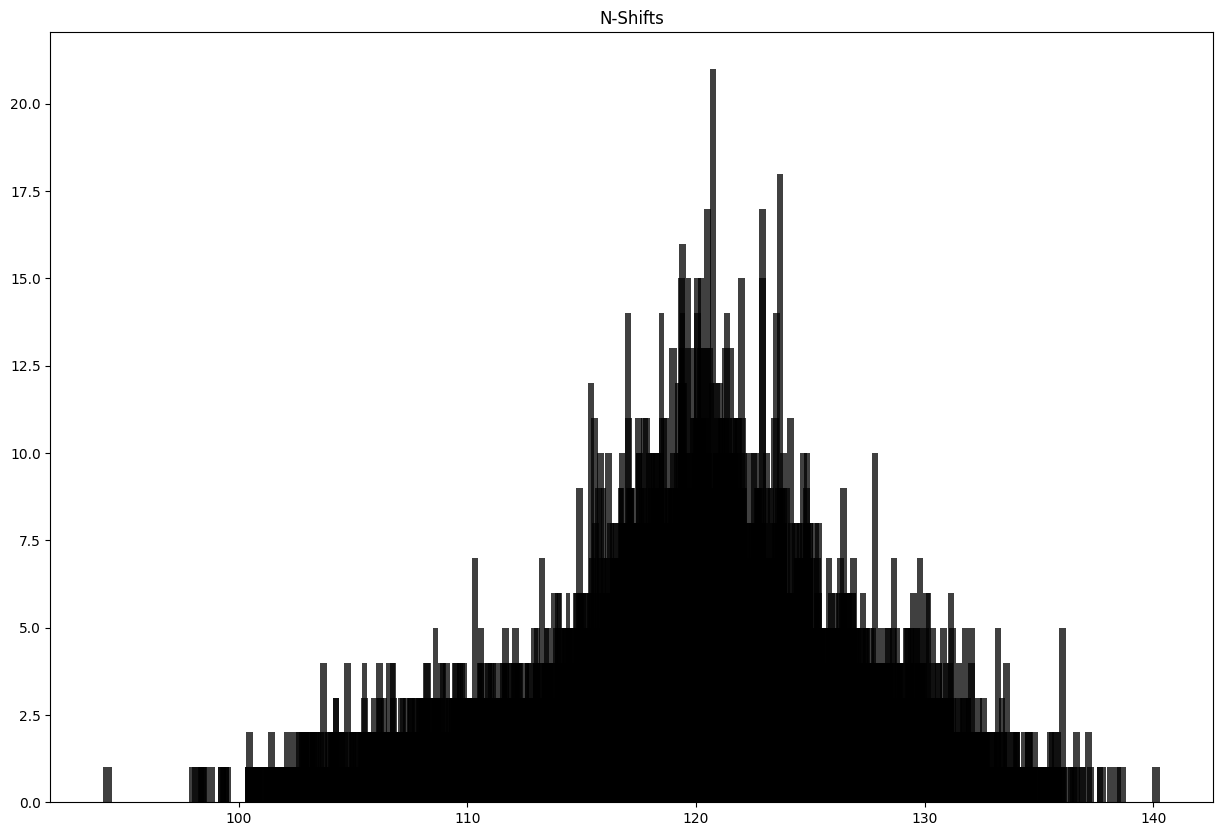

In [17]:
plt.figure(figsize=(15,10))
for bmrb_id in filtered_chemical_shifts:
    plt.hist(chemical_shifts[bmrb_id].Y_shift, 100, density=False, alpha=0.75, histtype="stepfilled", color="black")
plt.title("N-Shifts")
plt.show()

## Filtering

In [37]:
N_to_large_or_small = []
for bmrb_id in filtered_chemical_shifts:
    if max(chemical_shifts[bmrb_id].Y_shift) > 140 or min(chemical_shifts[bmrb_id].Y_shift) < 90:
        print(bmrb_id, ":", "max --> ",max(chemical_shifts[bmrb_id].Y_shift), "min --> ", min(chemical_shifts[bmrb_id].Y_shift))
        N_to_large_or_small.append(bmrb_id)

5060 : max -->  140.3 min -->  105.1


In [38]:
for bmrb_id in N_to_large_or_small:
    if bmrb_id not in H_to_large_or_small:
        print(bmrb_id)
        keys.remove(bmrb_id)

5060


In [39]:
len(keys)

522

In [40]:
keys[:10]

[6150, 6152, 6158, 6161, 6162, 6172, 6173, 6175, 4129, 6177]

---

In [41]:
with open("2006_filtered_by_shifts.txt", "w") as outfile:
    outfile.writelines(",".join(map(str, keys)))